In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
relative_path = "tw-zad1/src/main/resources/"
philv_dirs = ["philv1/", "philv2/", "philv3/", "philv4/", "philv5/", "philv6/"]
phil_dirs = ["phil_5/", "phil_10/", "phil_20/"]

In [3]:
def plot_graph_for_selected_dataset(philv_dir, phil_dir):
    variant = philv_dir[5]
    no_phil = int(phil_dir[5:phil_dir.find("/")])
    
    times = [0. for _ in range(no_phil)]
    phils = [i+1 for i in range(no_phil)]
    
    for i in range(no_phil):
        df = pd.read_csv(relative_path + philv_dir + phil_dir + f"phil_n{phils[i]}.csv")
        times[i] = np.mean(df["Time"].values)
        
    fig, ax = plt.subplots()
    fig.set_size_inches(0.8 * no_phil + 2, 0.2 * no_phil + 3)
    
    ax.bar(phils, times)
    ax.set_xticks([i for i in range(1, no_phil + 1)])
    ax.set_xlabel("Kolejni filozofowie", fontsize = 0.2 * no_phil + 8)
    ax.set_ylabel("Czas [ms]", fontsize = 0.2 * no_phil + 8)
    ax.set_title(f"Średni czas oczekiwania każdego filozofa\nna dostęp do widelców - wariant {variant}, {no_phil} filozofów", 
                 fontsize = 0.4 * no_phil + 8)

    plt.savefig(f"graphs/{philv_dir[:-1]}_{no_phil}.png")
    plt.show()

In [4]:
def plot_comparison_graph():
    avg_times = [[0. for _ in range(len(philv_dirs))] for _ in range(len(phil_dirs))]
    
    for i in range(len(phil_dirs)):
        phil_dir = phil_dirs[i]
        no_phil = int(phil_dir[5:phil_dir.find("/")])
        
        for j in range(len(philv_dirs)):
            philv_dir = philv_dirs[j]
            times = [0. for _ in range(no_phil)]
            
            for k in range(no_phil):
                df = pd.read_csv(relative_path + philv_dir + phil_dir + f"phil_n{k + 1}.csv")
                times[k] = np.mean(df["Time"].values)
                
            avg_times[i][j] = np.mean(times)
    
    barWidth = 0.25
    plt.figure(figsize = (15, 6))

    br1 = np.arange(len(avg_times[0])) 
    br2 = [x + barWidth for x in br1] 
    br3 = [x + barWidth for x in br2] 

    plt.bar(br1, avg_times[0], color = "green", width = barWidth, label = "Czas dla 5 filozofów") 
    plt.bar(br2, avg_times[1], color = "black", width = barWidth, label = "Czas dla 10 filozofów") 
    plt.bar(br3, avg_times[2], color = "red", width = barWidth, label = "Czas dla 20 filozofów") 

    plt.title("Wykres porównawczy uśrednionych czasów oczekiwania", fontsize = 16)
    plt.xlabel("Kolejne warianty", fontsize = 12) 
    plt.ylabel("Uśredniony czas oczekiwania [ms]", fontsize = 12) 
    plt.xticks([r + barWidth for r in range(len(avg_times[0]))], ["v1", "v2", "v3", "v4", "v5", "v6"])

    plt.legend()
    plt.savefig(f"graphs/comparison.png")
    plt.show() 

## Wykresy dla każdego wariantu dla liczby filozofów: 5, 10 i 20

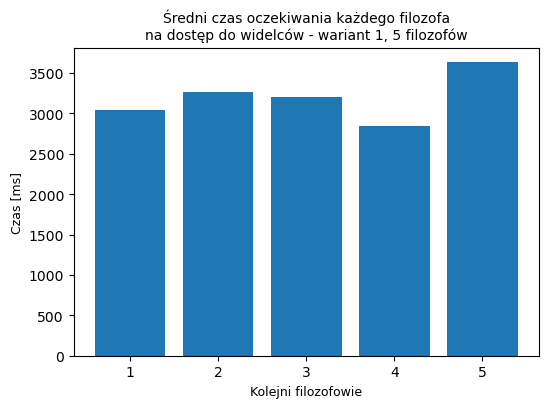

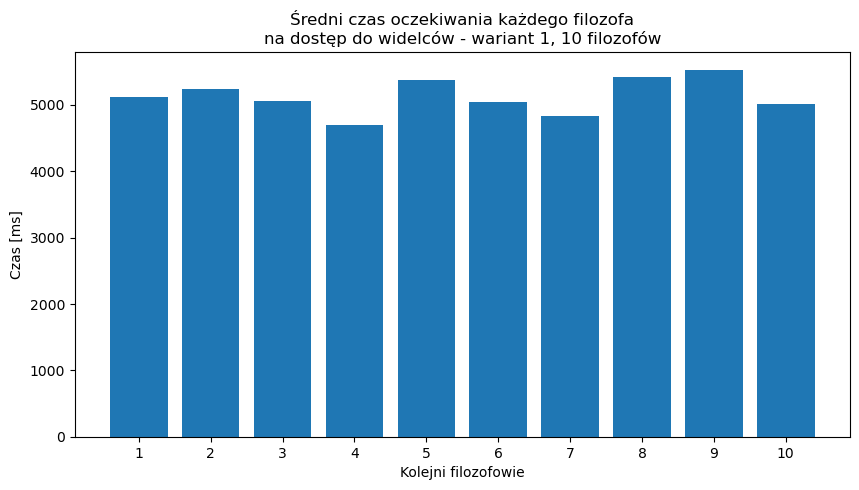

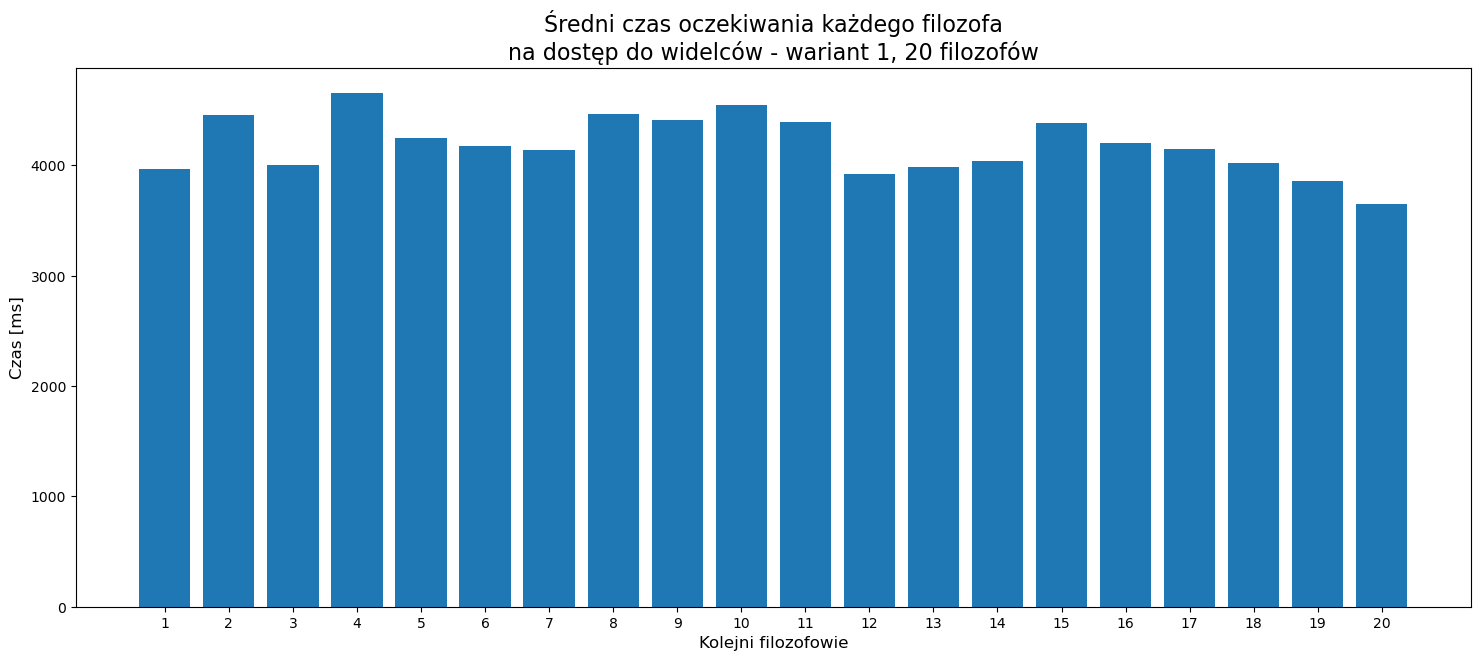

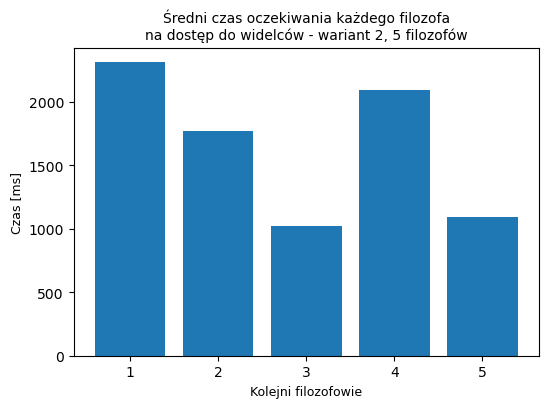

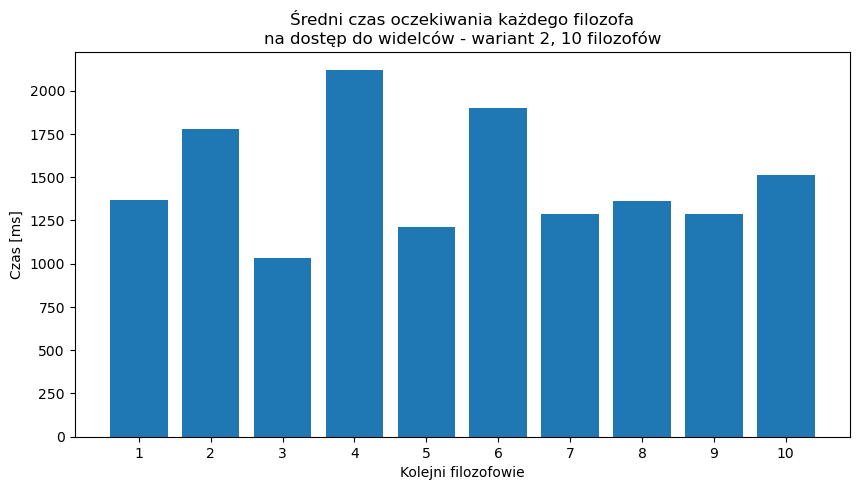

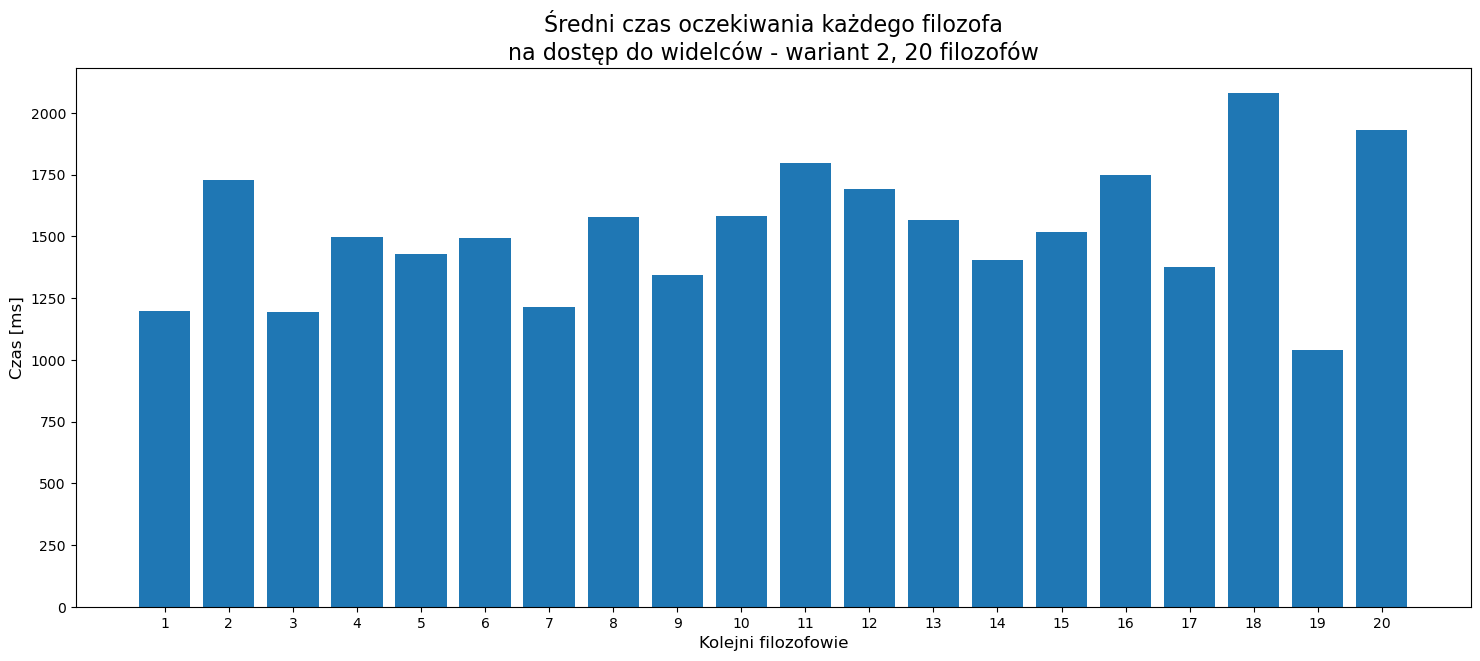

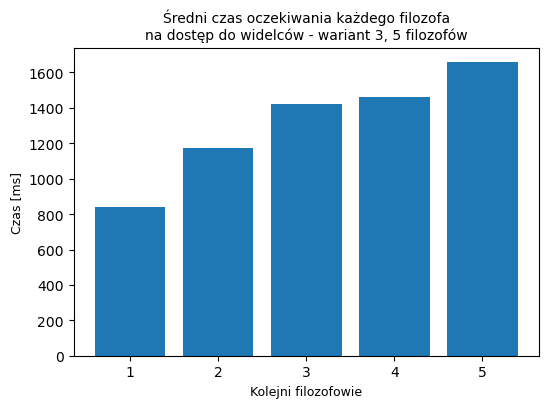

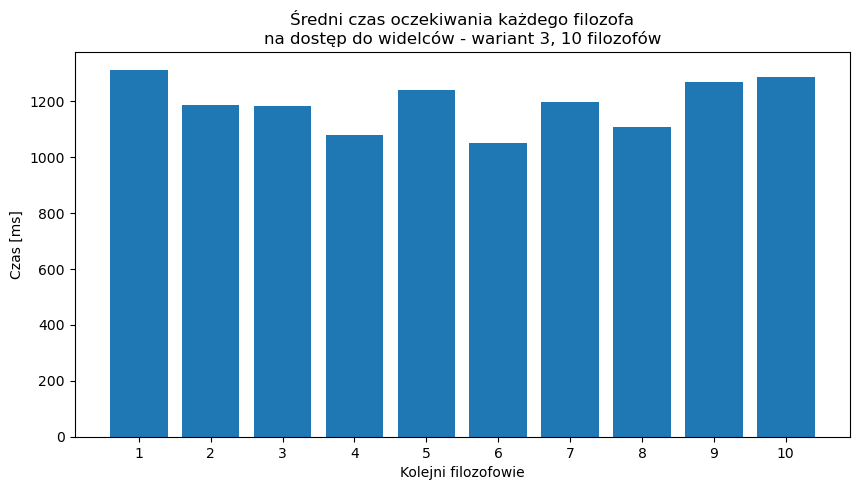

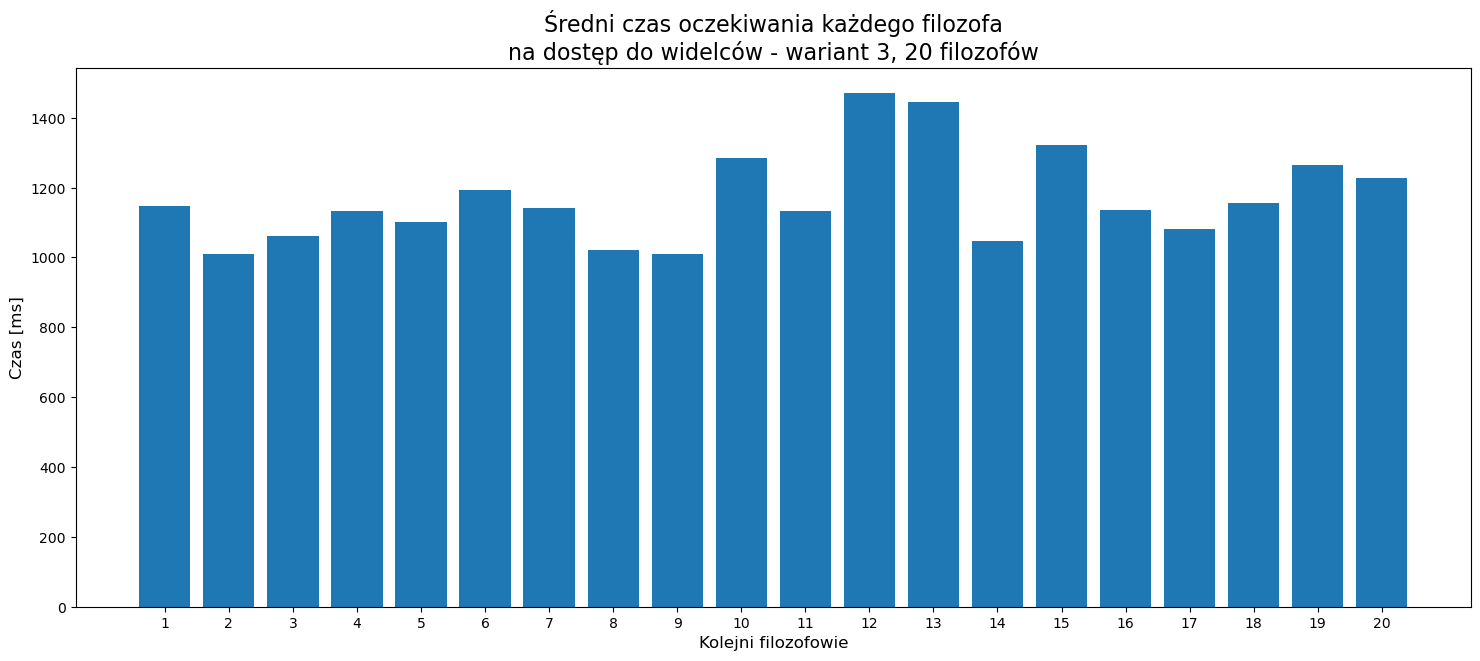

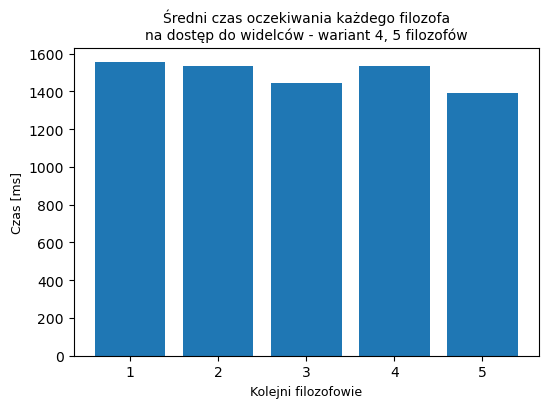

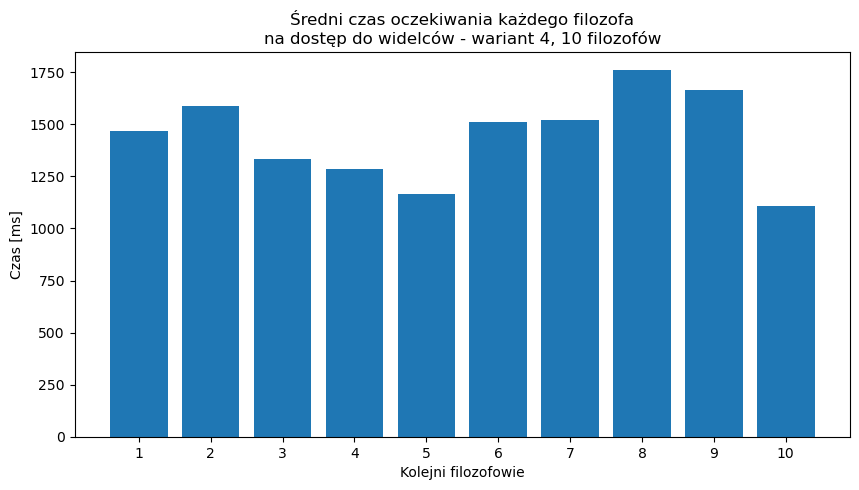

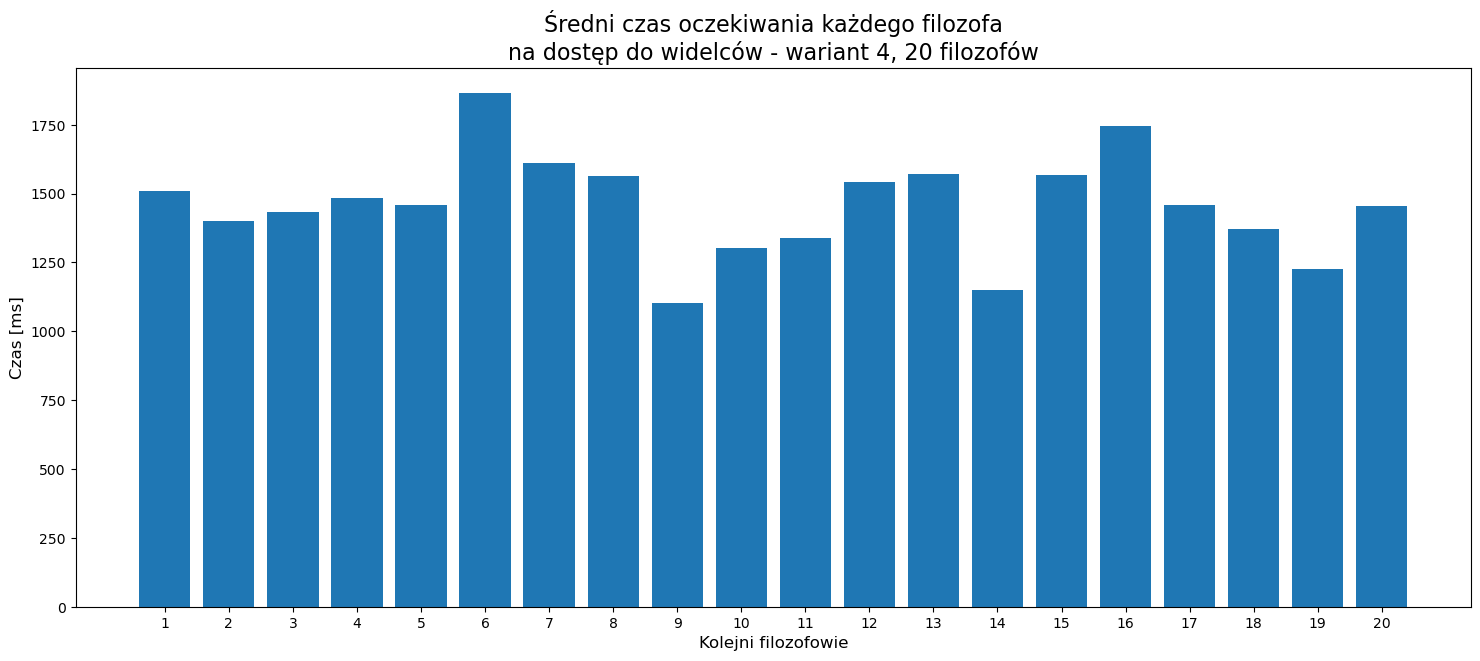

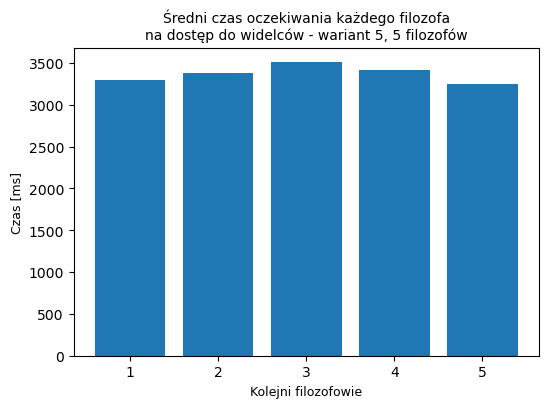

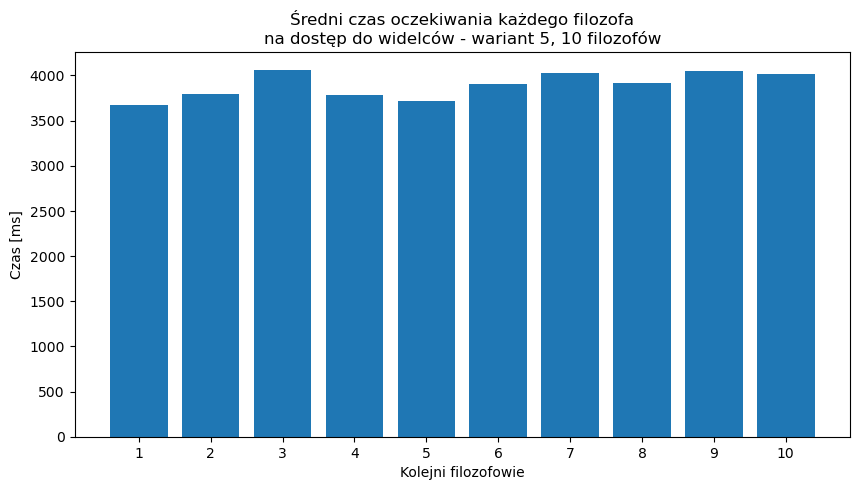

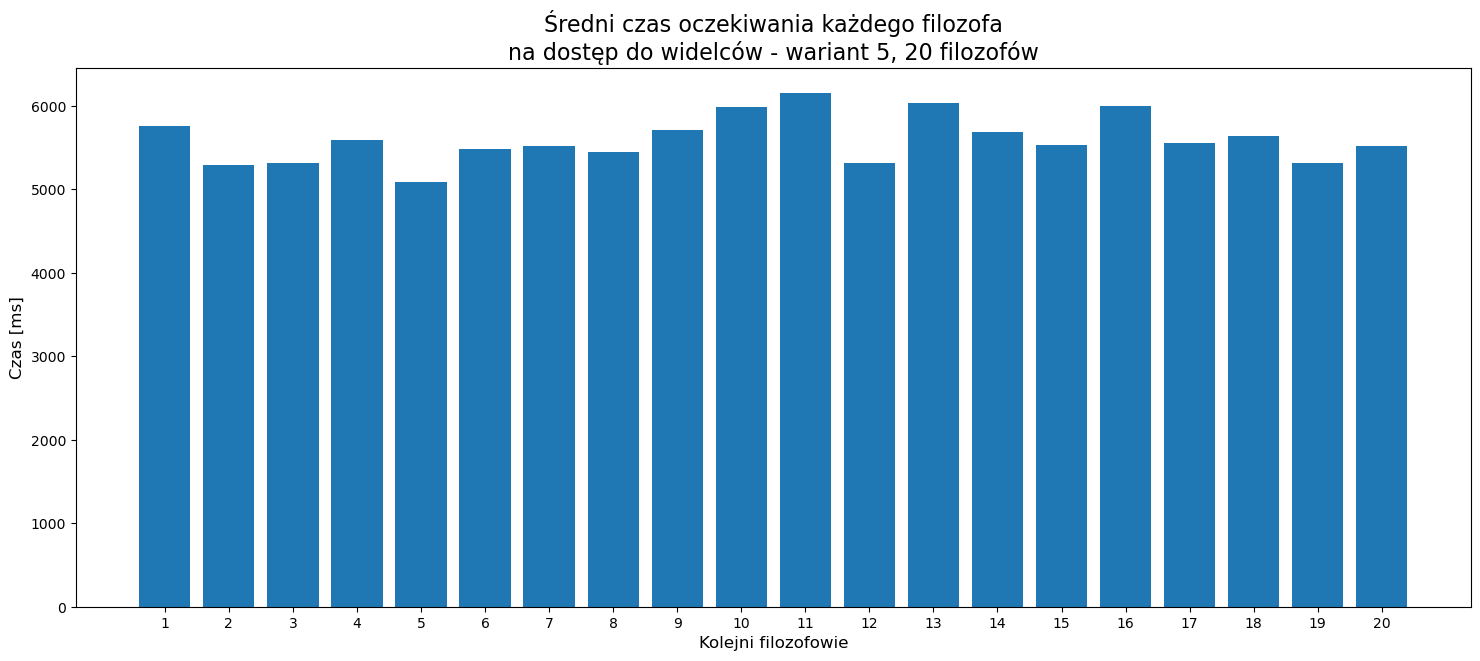

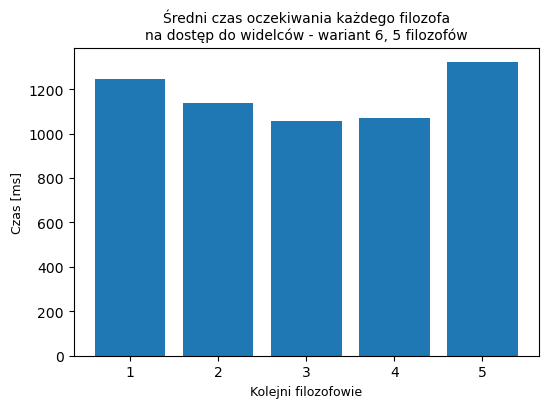

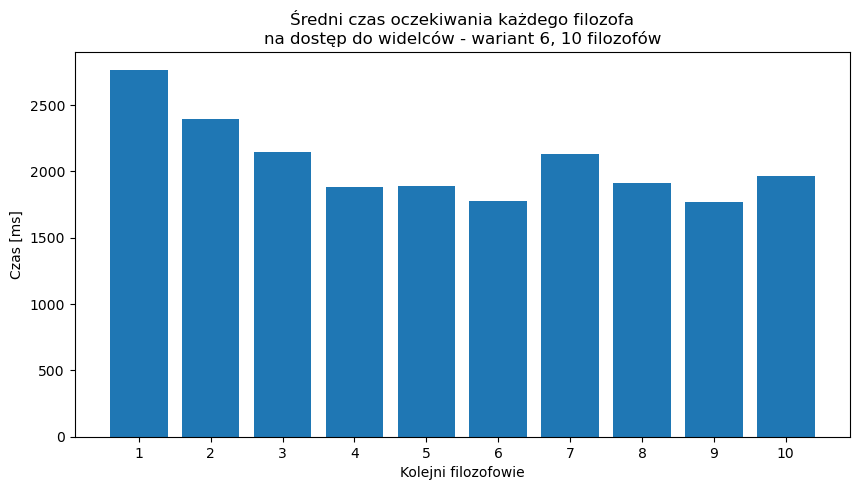

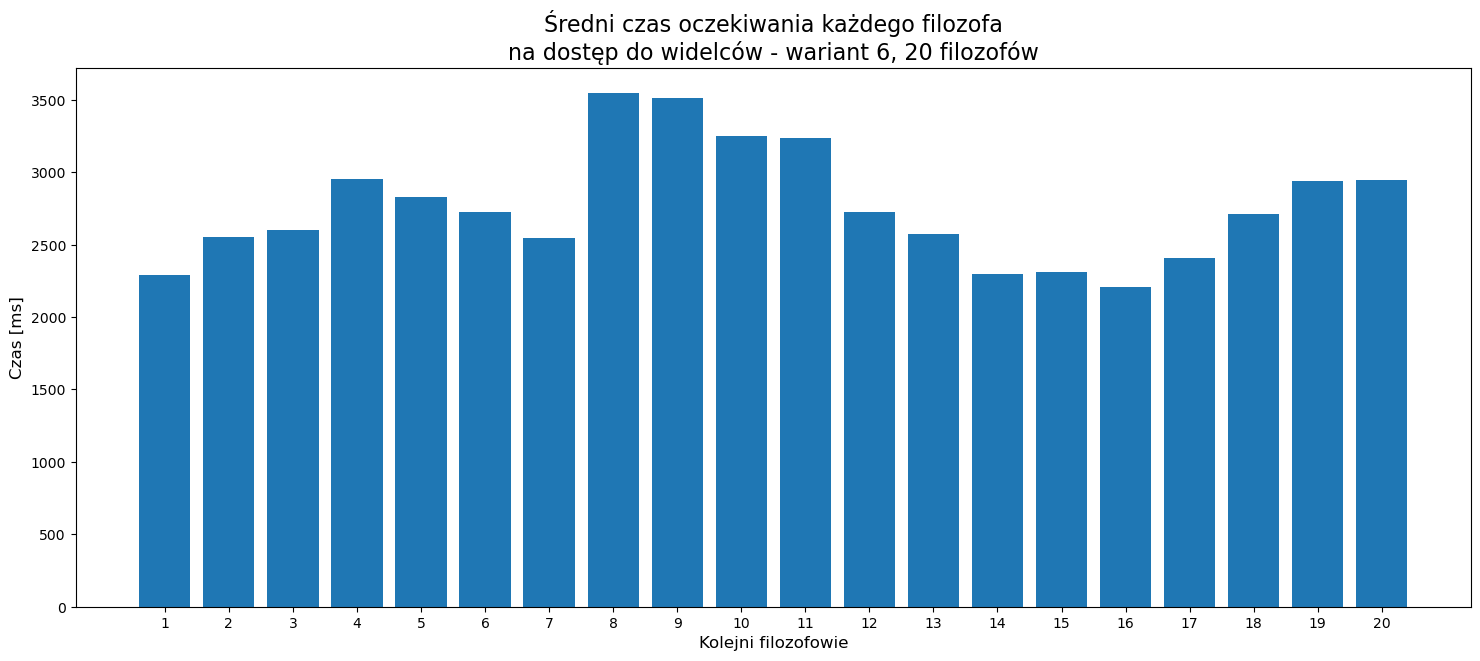

In [5]:
for philv_dir in philv_dirs:
    for phil_dir in phil_dirs:
        plot_graph_for_selected_dataset(philv_dir, phil_dir)

## Wykresy porównawcze - dla danej liczby filozofów między wariantami

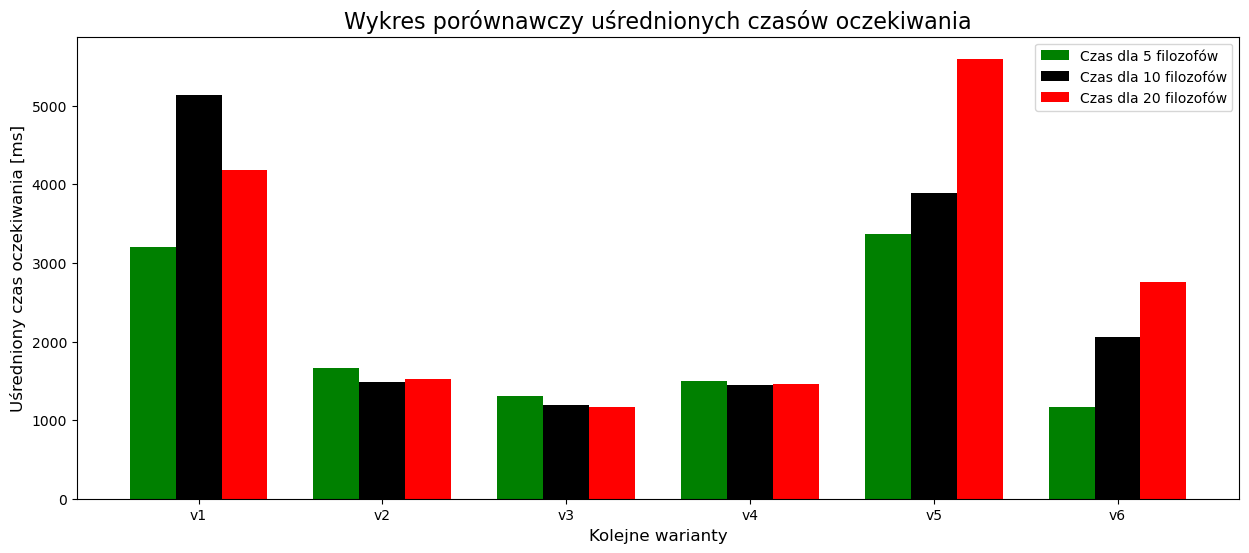

In [6]:
plot_comparison_graph()